# EDA

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [3]:
csv_file_path = r'C:\Users\user\OneDrive\Escritorio\SOYHENRY\Curso Data Science\PI1\dfreviews.csv'
dfreviews = pd.read_csv(csv_file_path)
print(dfreviews.head())

             user_id  item_id  \
0  76561197970982479     1250   
1  76561197970982479    22200   
2  76561197970982479    43110   
3            js41637   251610   
4            js41637   227300   

                                           helpful  recommend  \
0                                   No ratings yet       True   
1                                   No ratings yet       True   
2                                   No ratings yet       True   
3  15 of 20 people (75%) found this review helpful       True   
4     0 of 1 people (0%) found this review helpful       True   

                                              review  sentiment_analysis  
0  Simple yet with great replayability. In my opi...                   2  
1               It's unique and worth a playthrough.                   2  
2  Great atmosphere. The gunplay can be a bit chu...                   2  
3  I know what you think when you see this title ...                   2  
4  For a simple (it's actually not 

In [4]:
csv_file_path2 = r'C:\Users\user\OneDrive\Escritorio\SOYHENRY\Curso Data Science\PI1\dfgames.csv'
dfgames = pd.read_csv(csv_file_path2)
print(dfgames.head())

             publisher                                             genres  \
0            Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1     Making Fun, Inc.       ['Free to Play', 'Indie', 'RPG', 'Strategy']   
2         Poolians.com  ['Casual', 'Free to Play', 'Indie', 'Simulatio...   
3                 彼岸领域                  ['Action', 'Adventure', 'Casual']   
4  Trickjump Games Ltd              ['Action', 'Adventure', 'Simulation']   

                     title release_date  \
0      Lost Summoner Kitty   2018-01-04   
1                Ironbound   2018-01-04   
2  Real Pool 3D - Poolians   2017-07-24   
3                  弹炸人2222   2017-12-07   
4    Battle Royale Trainer   2018-01-04   

                                                tags  \
0  ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
1  ['Free to Play', 'Strategy', 'Indie', 'RPG', '...   
2  ['Free to Play', 'Simulation', 'Sports', 'Casu...   
3                  ['Action', 'Adventure', 'Casual']  

In [5]:
csv_file_path3 = r'C:\Users\user\OneDrive\Escritorio\SOYHENRY\Curso Data Science\PI1\dfitems.csv'
dfitems = pd.read_csv(csv_file_path3)
print(dfitems.head())

             user_id  items_count           steam_id  item_id  \
0  76561197970982479          277  76561197970982479       10   
1  76561197970982479          277  76561197970982479       20   
2  76561197970982479          277  76561197970982479       30   
3  76561197970982479          277  76561197970982479       40   
4  76561197970982479          277  76561197970982479       50   

                   item_name  playtime_forever  
0             Counter-Strike               6.0  
1      Team Fortress Classic               0.0  
2              Day of Defeat               7.0  
3         Deathmatch Classic               0.0  
4  Half-Life: Opposing Force               0.0  


In [6]:
# Chequeando la cantidad de juegos que hay en cada df
print(dfgames['id'].nunique())
print(dfreviews['item_id'].nunique())
print(dfitems['item_id'].nunique())


29780
3682
10978


In [7]:
dfgames.describe()

,price,id,year
count,29782.000000,2.978100e+04,29782.000000
mean,8.577877,4.429936e+05,2014.759183
std,16.392432,1.838870e+05,3.508268
min,0.000000,1.000000e+01,1970.000000
25%,1.990000,3.211420e+05,2014.000000
50%,4.990000,4.368600e+05,2016.000000
75%,9.990000,5.875100e+05,2017.000000
max,995.000000,2.028850e+06,2021.000000


In [14]:
# Creando un dataframe con mas datos para su posterior análisis
merged_df = pd.merge(dfgames[['id', 'genres','release_date']],
                     dfreviews[['item_id','recommend','review','sentiment_analysis']], 
                     left_on='id', right_on='item_id', how='left')


In [17]:
#Hay 26000 juegos que estan en el dataframe games, pero no tienen reseñas disponibles.
merged_df.isnull().sum()

id                        1
genres                    0
release_date              0
item_id               26675
recommend             26675
review                26699
sentiment_analysis    26675
dtype: int64

In [20]:
# Eliminar todas las filas que contienen valores nulos en cualquier columna
merged_df = merged_df.dropna()


In [21]:
#Exploración de datos
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')


merged_df['year'] = merged_df['release_date'].dt.year

df_recommended = merged_df[merged_df['recommend'] == True].copy()  # Hacemos una copia explícita del DataFrame


df_recommended['genres'] = df_recommended['genres'].str.replace(r"[\[\]']", '', regex=True)  # Limpiamos corchetes y apóstrofes
df_recommended['genres'] = df_recommended['genres'].str.split(',')  # Ajustamos el delimitador (coma en este caso)
df_recommended = df_recommended.explode('genres')
df_recommended['genres'] = df_recommended['genres'].str.strip()

# Agrupar por género y año, y contar las recomendaciones
recommended_by_genre_and_year = df_recommended.groupby(['genres', 'year']).size().reset_index(name='recommendation_count')

# Ordenar los resultados por año y por cantidad de recomendaciones
recommended_by_genre_and_year = recommended_by_genre_and_year.sort_values(by=['year', 'recommendation_count'], ascending=[True, False])

# Mostrar el género más recomendado por cada año
top_recommended_genre_per_year = recommended_by_genre_and_year.groupby('year').first().reset_index()

print(top_recommended_genre_per_year)


C:\Users\user\AppData\Local\Temp\ipykernel_8380\3398616032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_8380\3398616032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = merged_df['release_date'].dt.year


    year     genres  recommendation_count
0   1989  Adventure                     1
1   1990     Action                     3
2   1991     Action                     1
3   1992  Adventure                     3
4   1993   Strategy                     3
5   1994     Action                    12
6   1995     Action                    15
7   1996  Adventure                     4
8   1997  Adventure                    24
9   1998     Action                    72
10  1999     Action                    50
11  2000     Action                    90
12  2001     Action                    18
13  2002        RPG                    17
14  2003     Action                   149
15  2004     Action                   485
16  2005     Action                   233
17  2006      Indie                  1771
18  2007     Action                  3869
19  2008     Action                   229
20  2009     Action                  1388
21  2010     Action                  1179
22  2011     Action               

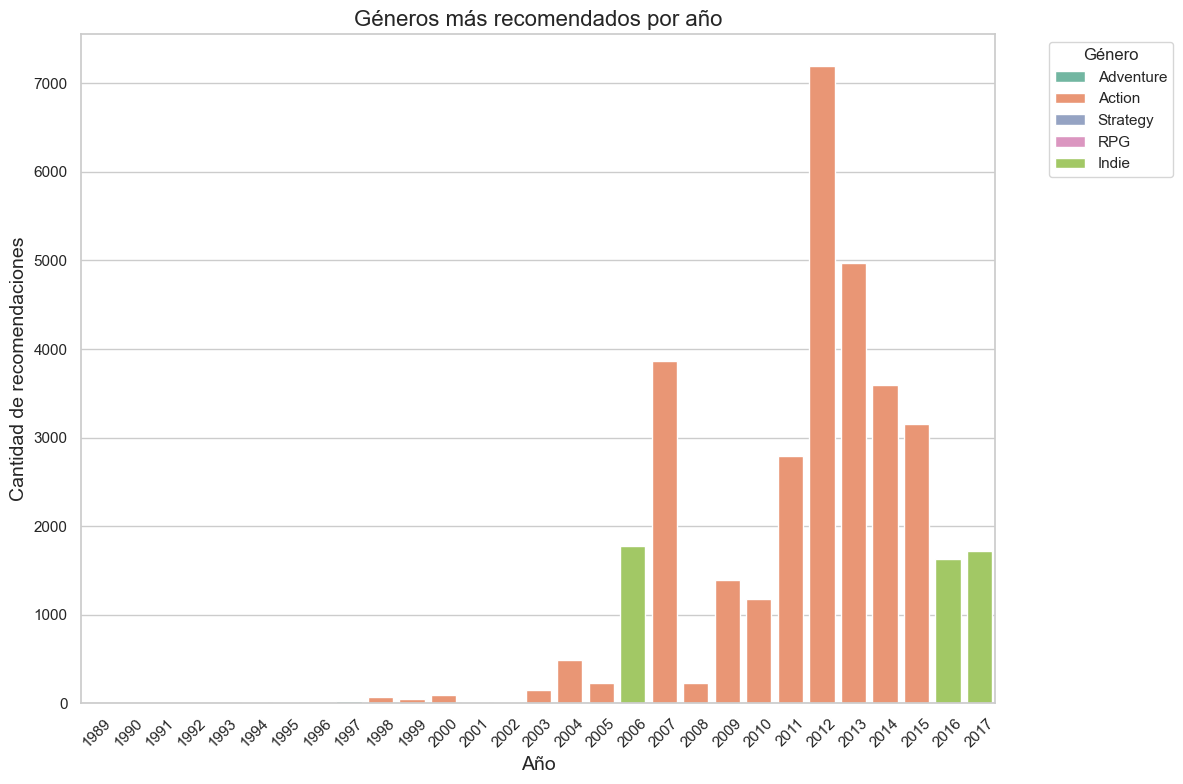

In [23]:
#Grafico de géneros más recomendados por año
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))  # Aumentamos el tamaño del gráfico para mayor claridad
sns.barplot(x='year', y='recommendation_count', hue='genres', data=top_recommended_genre_per_year, palette='Set2')

plt.title('Géneros más recomendados por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de recomendaciones', fontsize=14)

plt.xticks(rotation=45)

plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [25]:
# Juegos más recomendados
df_recommended = merged_df[merged_df['recommend'] == True].copy()

top_games = df_recommended.groupby('item_id').size().reset_index(name='recommendation_count')

top_20_games = top_games.sort_values(by='recommendation_count', ascending=False).head(20)

top_20_games = pd.merge(top_20_games, dfgames[['id', 'title']], left_on='item_id', right_on='id', how='left')

top_20_games = top_20_games.sort_values(by='recommendation_count', ascending=False)  # Para que el gráfico tenga los más grandes al final


C:\Users\user\AppData\Local\Temp\ipykernel_8380\533088471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recommendation_count', y='title', data=top_20_games, palette='Blues_d')


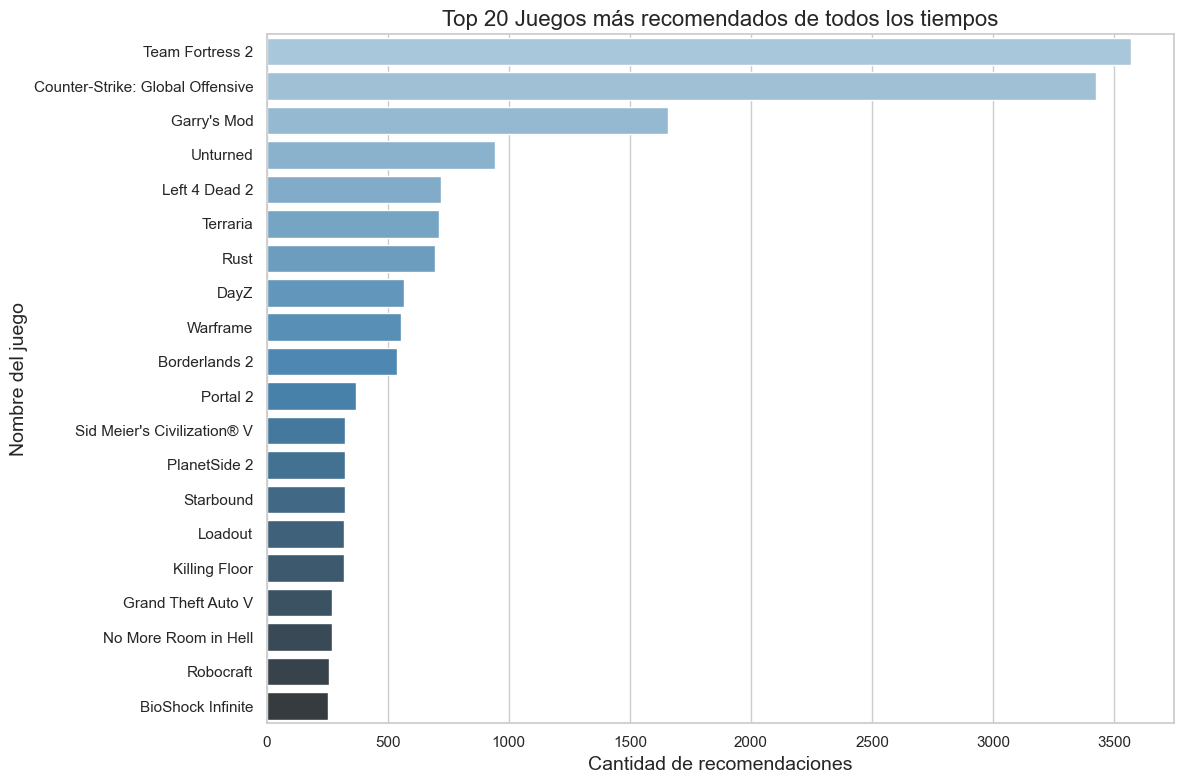

In [26]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='recommendation_count', y='title', data=top_20_games, palette='Blues_d')

plt.title('Top 20 Juegos más recomendados de todos los tiempos', fontsize=16)
plt.xlabel('Cantidad de recomendaciones', fontsize=14)
plt.ylabel('Nombre del juego', fontsize=14)

plt.tight_layout()
plt.show()


In [27]:
#Top 20 empresas desarrolladoras

df_recommended = merged_df[merged_df['recommend'] == True].copy()

top_developers = df_recommended.groupby('item_id').size().reset_index(name='recommendation_count')

top_20_dev = top_developers.sort_values(by='recommendation_count', ascending=False).head(20)

top_20_dev = pd.merge(top_20_dev, dfgames[['id', 'developer']], left_on='item_id', right_on='id', how='left')

top_20_dev = top_20_dev.sort_values(by='recommendation_count', ascending=False)  # Para que el gráfico tenga los más grandes al final


C:\Users\user\AppData\Local\Temp\ipykernel_8380\139535981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recommendation_count', y='developer', data=top_20_dev, palette='Blues_d')


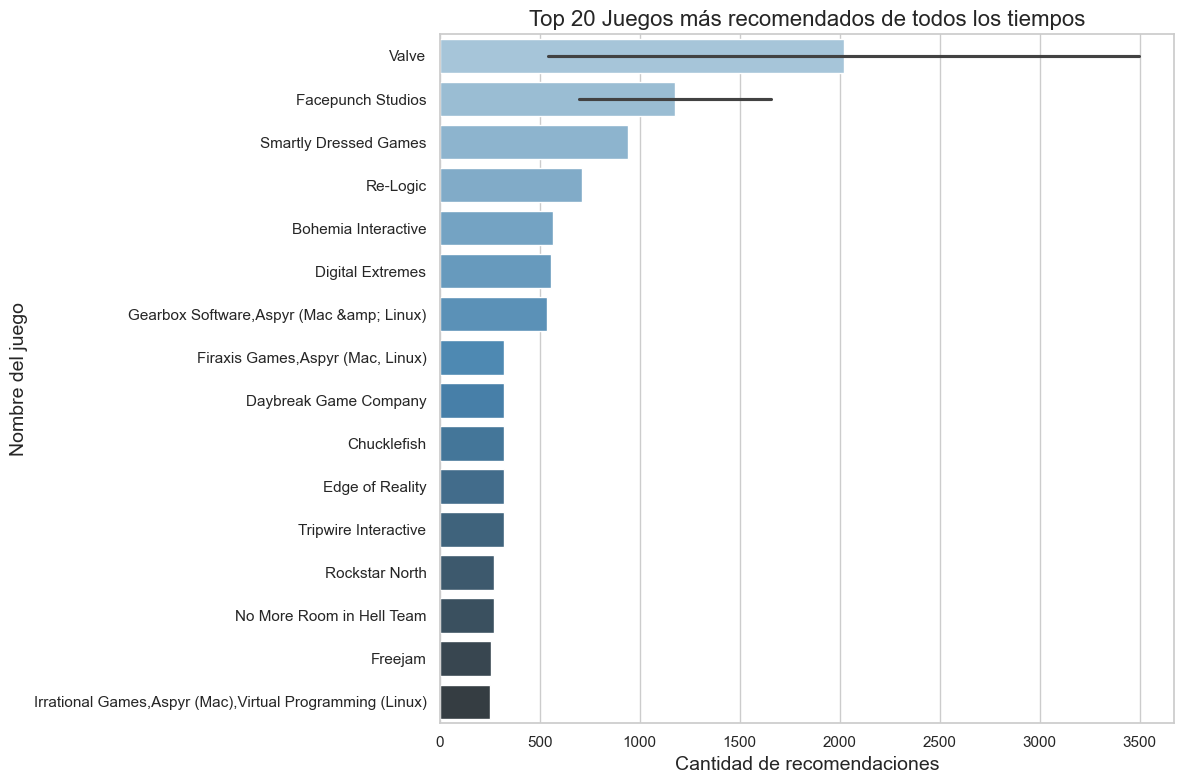

In [28]:
#Grafico de los top 20 desarrolladores en base a cantidad de recomendaciones
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='recommendation_count', y='developer', data=top_20_dev, palette='Blues_d')

plt.title('Top 20 Juegos más recomendados de todos los tiempos', fontsize=16)
plt.xlabel('Cantidad de recomendaciones', fontsize=14)
plt.ylabel('Nombre del juego', fontsize=14)

plt.tight_layout()
plt.show()



In [31]:
# Transformacion de datos para ver cantidad de horas en base a genero
merged_df = pd.merge(dfitems[['user_id', 'item_id', 'playtime_forever']], 
                     dfgames[['id', 'genres', 'release_date']], 
                     left_on='item_id', right_on='id', how='left')


merged_df['genres'] = merged_df['genres'].str.replace(r"[\[\]']", '', regex=True)  
merged_df['genres'] = merged_df['genres'].str.split(',') 

df_final = merged_df.explode('genres')

df_final['genres'] = df_final['genres'].str.strip()

df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')

df_final['year'] = df_final['release_date'].dt.year

df_final['playtime_forever'] = pd.to_numeric(df_final['playtime_forever'], errors='coerce')

df_final['playtime_forever'] = df_final['playtime_forever'] / 60

df_final = df_final[df_final['playtime_forever'] > 0.00]


In [32]:
# Agrupar por año y género, y sumar horas de juego
genre_year_data = df_final.groupby(['year', 'genres'])['playtime_forever'].sum().reset_index()


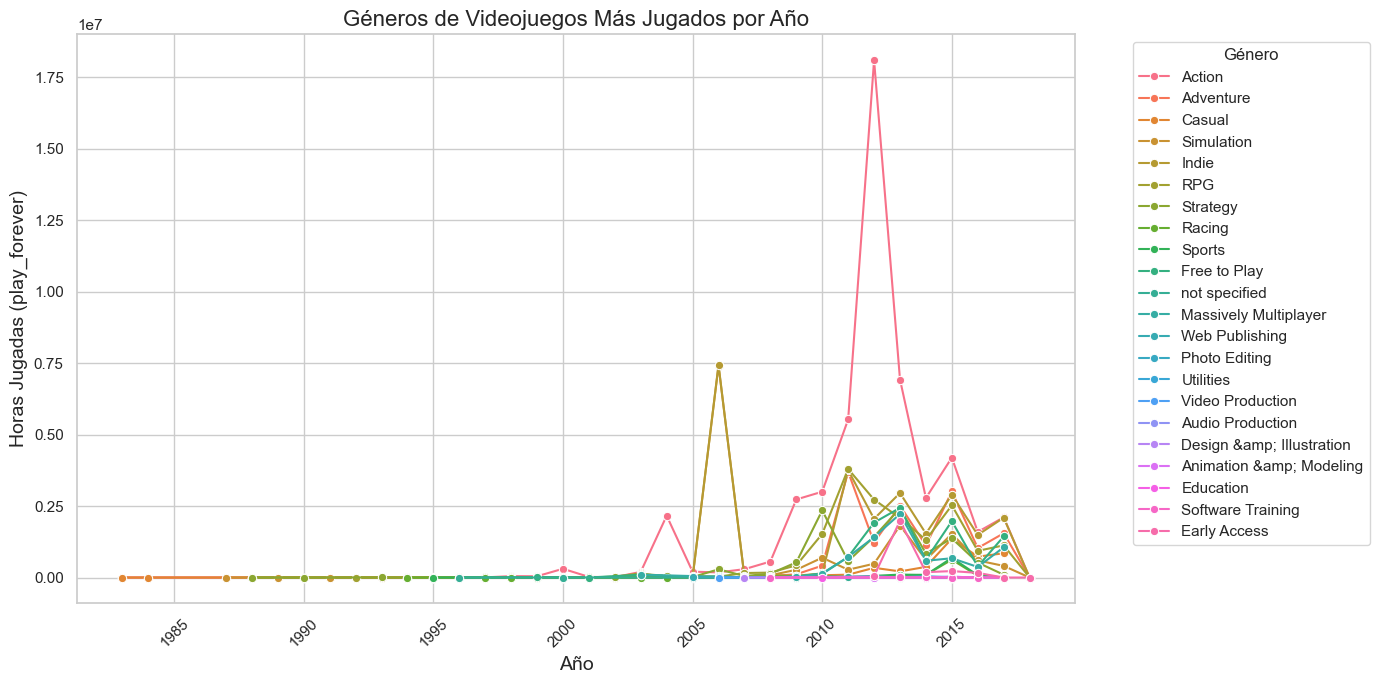

In [33]:
# Configuración del gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_year_data, x='year', y='playtime_forever', hue='genres', marker='o')

# Configurar el título y las etiquetas
plt.title('Géneros de Videojuegos Más Jugados por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Horas Jugadas (play_forever)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


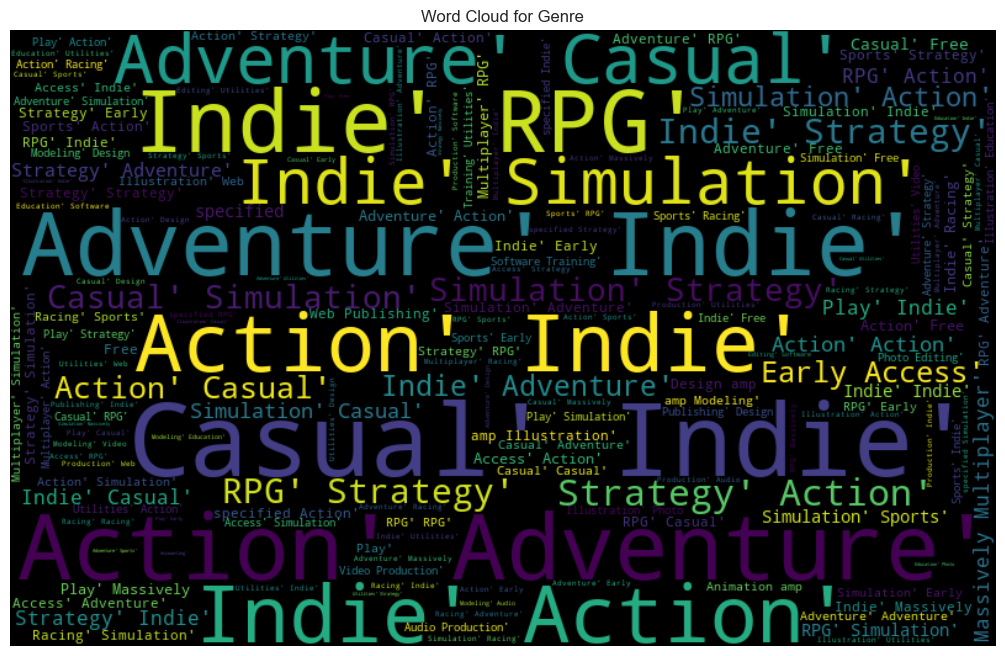

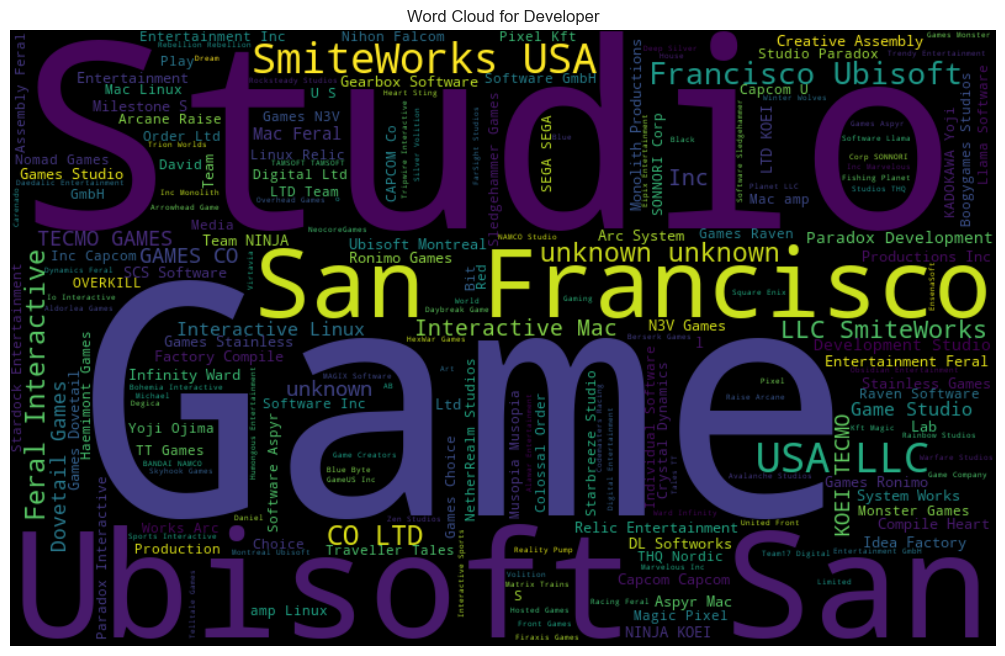

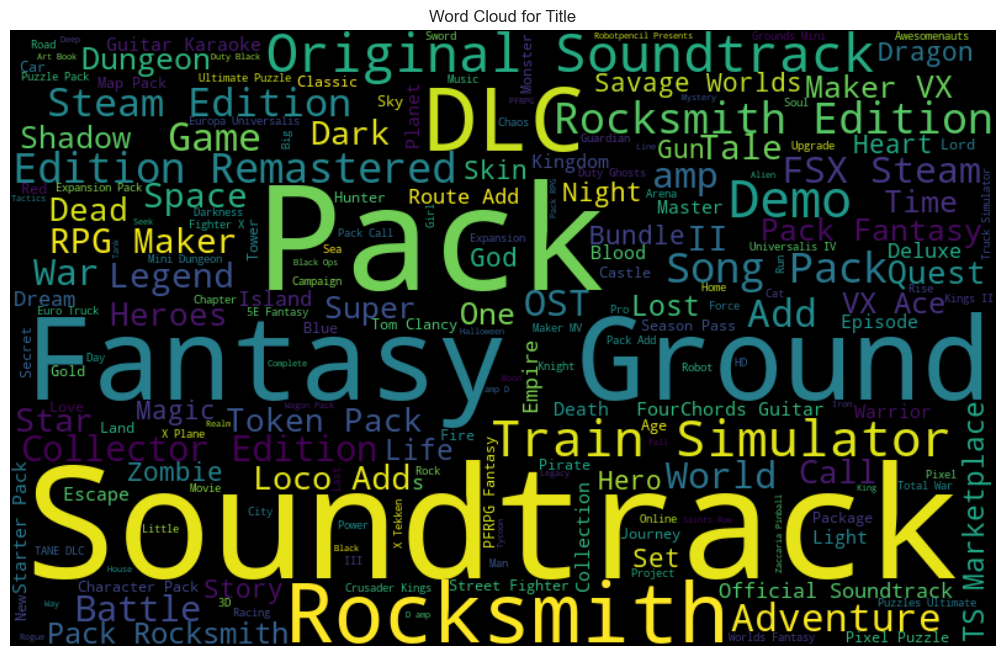

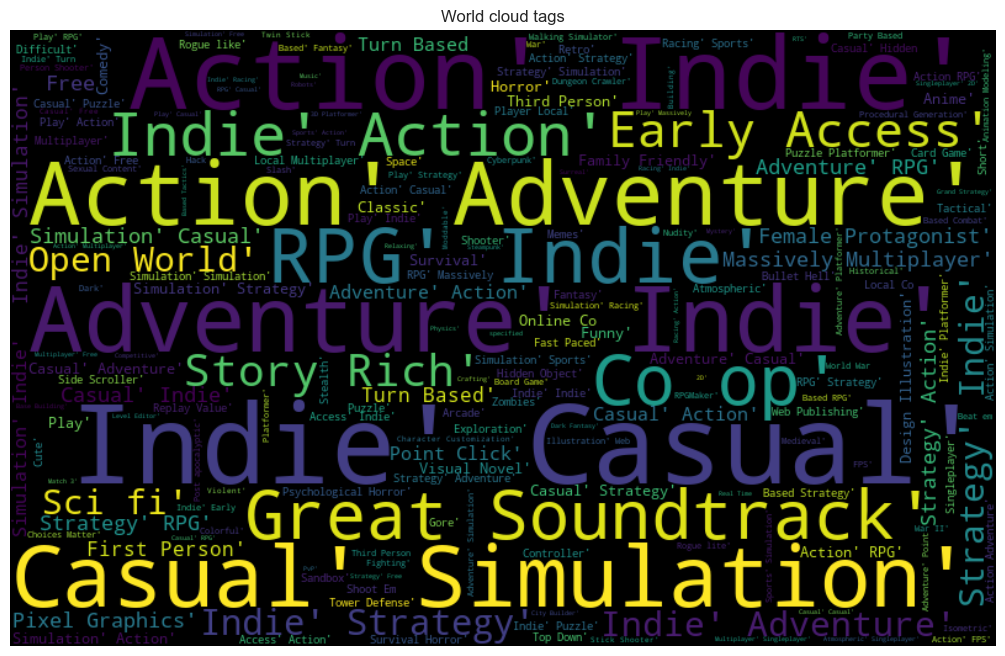

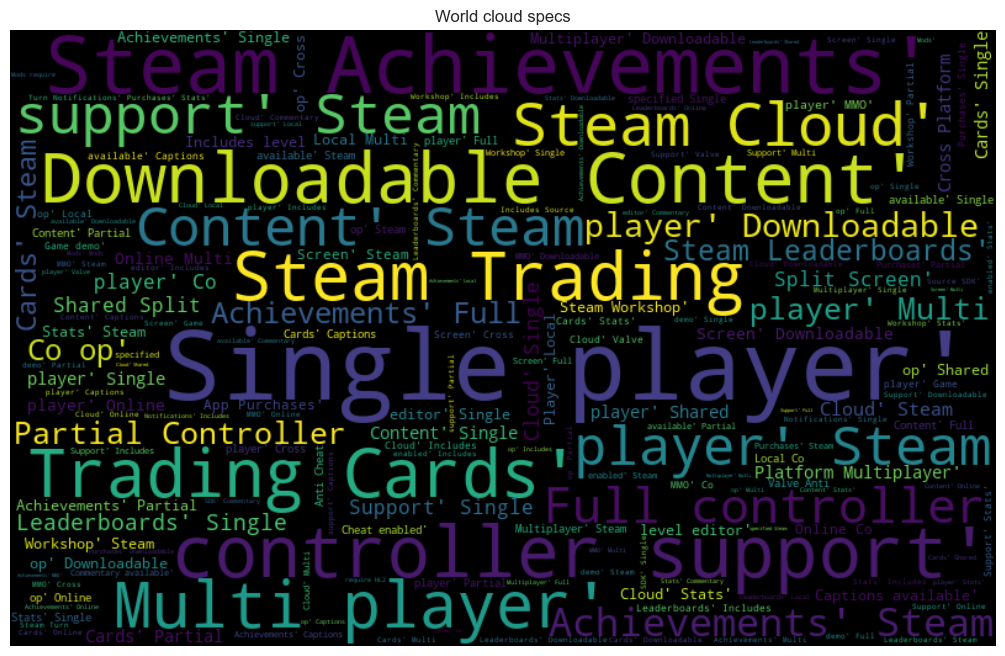

In [35]:
#Exploración de variables string en dfgames

genre_string = " ".join(dfgames['genres'].astype(str))
developer_string = " ".join(dfgames['developer'].astype(str))
title_string = " ".join(dfgames['title'].astype(str))
tags_string = " ".join(dfgames['tags'].astype(str))
specs_string = " ".join(dfgames['specs'].astype(str))

stop_words = set(STOPWORDS)

def wordcloud(string, title="unknown"):
    wc = WordCloud(width=800, height=500, mask=None, random_state=21,
                   stopwords=stop_words).generate(string)
    fig = plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

# Generar y mostrar nubes de palabras para cada columna
wordcloud(genre_string, title="Word Cloud for Genre")
wordcloud(developer_string, title="Word Cloud for Developer")
wordcloud(title_string, title="Word Cloud for Title")
wordcloud(tags_string, title ="World cloud tags")
wordcloud(specs_string, title = 'World cloud specs')


In [36]:
dfgames['price'].describe()

count    29782.000000
mean         8.577877
std         16.392432
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [37]:
dfitems['playtime_forever'].describe()

count    5.094092e+06
mean     9.905144e+02
std      5.414110e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

In [38]:

Q1 = dfgames['price'].quantile(0.25)
Q3 = dfgames['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar outliers
outliers_price = dfgames[(dfgames['price'] < lower_bound) | (dfgames['price'] > upper_bound)]

# Mostrar outliers
print("Outliers en 'price':")
print(outliers_price)


Outliers en 'price':
                              publisher  \
7                Poppermost Productions   
15               Poppermost Productions   
45                               SimBin   
219                              NCsoft   
296             Dovetail Games - Trains   
...                                 ...   
29623                           unknown   
29636  Firedog Creative Company Limited   
29647                 CarX Technologies   
29731                  DreamInCode B.V.   
29747                        Koch Media   

                                                  genres  \
7      ['Free to Play', 'Indie', 'Simulation', 'Sports']   
15     ['Free to Play', 'Indie', 'Simulation', 'Sports']   
45                                            ['Racing']   
219                     ['Massively Multiplayer', 'RPG']   
296                                       ['Simulation']   
...                                                  ...   
29623  ['Animation &amp; Modeling', 'Desig

In [43]:
# Calcular Q1 y Q3
Q1_playtime = dfitems['playtime_forever'].quantile(0.25)
Q3_playtime = dfitems['playtime_forever'].quantile(0.75)
IQR_playtime = Q3_playtime - Q1_playtime

# Definir límites para outliers
lower_bound_playtime = Q1_playtime - 1.5 * IQR_playtime
upper_bound_playtime = Q3_playtime + 1.5 * IQR_playtime

# Encontrar outliers
outliers_playtime = dfitems[(dfitems['playtime_forever'] < lower_bound_playtime) | 
                             (dfitems['playtime_forever'] > upper_bound_playtime)]

# Mostrar outliers
print("Outliers en 'playtime_forever':")
print(outliers_playtime.head())


Outliers en 'playtime_forever':
              user_id  items_count           steam_id  item_id  \
8   76561197970982479          277  76561197970982479      300   
9   76561197970982479          277  76561197970982479      240   
16  76561197970982479          277  76561197970982479     6910   
29  76561197970982479          277  76561197970982479     7940   
40  76561197970982479          277  76561197970982479     4560   

                            item_name  playtime_forever  
8               Day of Defeat: Source            4733.0  
9              Counter-Strike: Source            1853.0  
16  Deus Ex: Game of the Year Edition            2685.0  
29     Call of Duty 4: Modern Warfare            1185.0  
40                  Company of Heroes            1061.0  
